In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('jobs.csv')
data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [9]:
data.shape

(27010, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27010 entries, 0 to 27009
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               27010 non-null  int64 
 1   Job Salary               27010 non-null  object
 2   Job Experience Required  27010 non-null  object
 3   Key Skills               27010 non-null  object
 4   Role Category            27010 non-null  object
 5   Functional Area          27010 non-null  object
 6   Industry                 27010 non-null  object
 7   Job Title                27010 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [11]:
data = data.drop("Unnamed: 0",axis=1)

In [12]:
data.isna().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

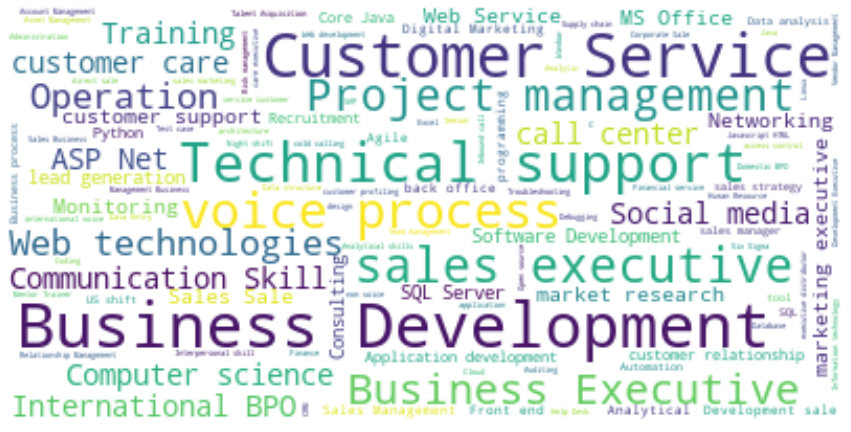

In [14]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
data.columns

Index(['Job Salary', 'Job Experience Required', 'Key Skills', 'Role Category',
       'Functional Area', 'Industry', 'Job Title'],
      dtype='object')

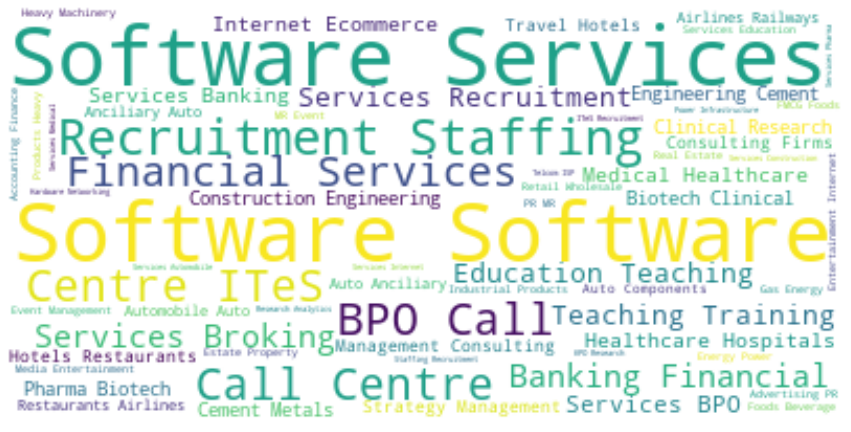

In [17]:
text = " ".join(i for i in data["Industry"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

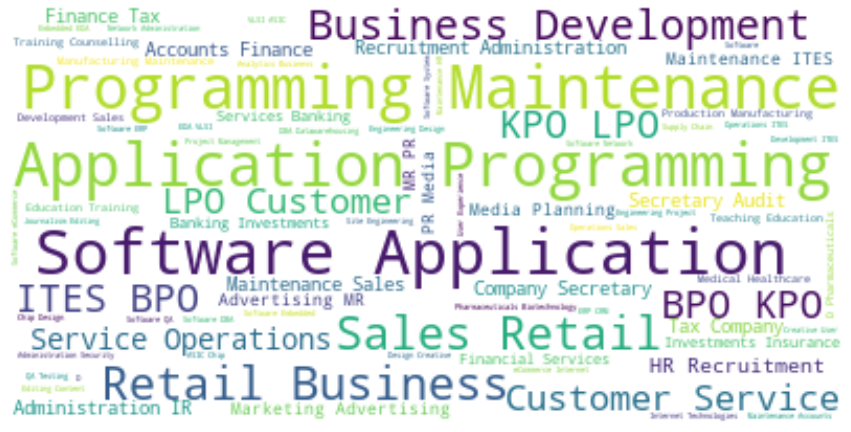

In [18]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

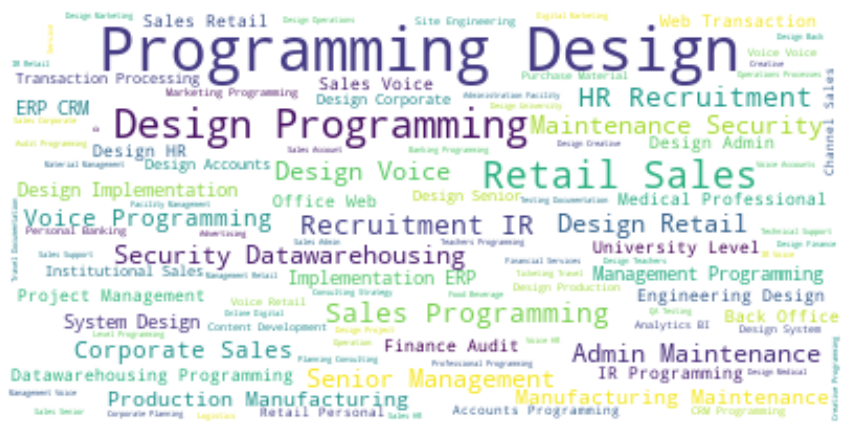

In [19]:
text = " ".join(i for i in data["Role Category"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

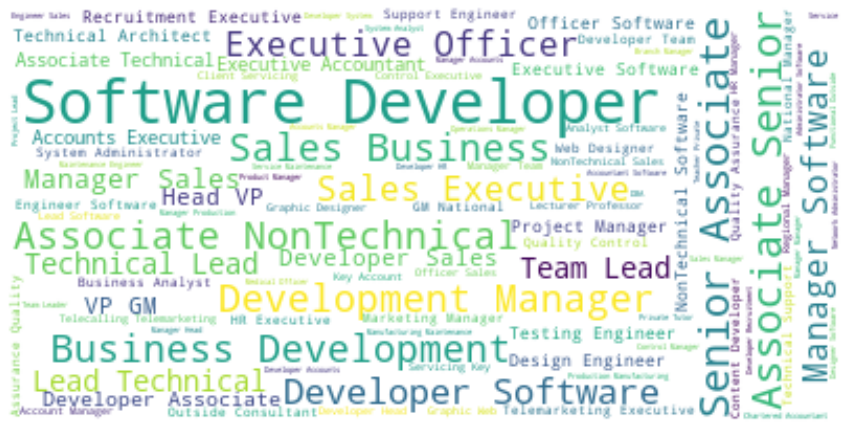

In [20]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

creating a job recommendation system. The Key Skills column in the dataset contains the skills required for the job role. We can use the Key Skills column to recommend jobs to the users. So here’s how we can use the cosine similarity algorithm to create a similarity matrix from the Key Skills column:

In [21]:
from sklearn.feature_extraction import text
feature = data["Key Skills"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

set the Job title column as the index of the dataset so that the users can find similar jobs according to the job they are looking for:

In [22]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

In [24]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
6249          Sales/Business Development Manager               4 - 5 yrs   
6248                          Software Developer               2 - 5 yrs   
6247  Associate/Senior Associate -(NonTechnical)              5 - 10 yrs   
6246                          Software Developer               1 - 6 yrs   
6245  Associate/Senior Associate -(NonTechnical)               1 - 4 yrs   

                                             Key Skills  
6249   Networking| Printing| Aerospace| Raw material...  
6248   PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...  
6247   Data analysis| Investment banking| Financial ...  
6246   Coding| Wordpress| Commerce| HTML| Troublesho...  
6245   client servicing| client support| background ...  


In [26]:
data.tail()

,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
27005,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27006,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27007,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27008,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer
27009,Not Disclosed by Recruiter,2 - 7 yrs,Press release| Public relations| Publishing| ...,Online/Digital Marketing,"Marketing , Advertising , MR , PR , Media Plan...","IT-Software, Software Services",Search Engine Optimisation /SEO Specialist


In [28]:
indices = pd.Series(data.index, index=data['Role Category']).drop_duplicates()

In [29]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Role Category', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Operations"))

            Role Category Job Experience Required  \
154                 Voice               0 - 1 yrs   
153  Programming & Design             2 - 4 Years   
152                 Voice               0 - 2 yrs   
151  Programming & Design               2 - 4 yrs   
150   Institutional Sales               4 - 9 yrs   

                                            Key Skills  
154                              MS Office| Data entry  
153  Oracle|Core Java|Business process|Outsourcing|...  
152   customer service| customer care| team| commun...  
151   ajax| javascript| php| erp| website| developm...  
150   Product management| Business process| Linkedi...  
